In [1]:
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv(r"D:\jupyter_project\Time_Series\timeSeries\data\daily-total-female-births-CA.csv")
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace = True)

#### ADFULLER -TEST :---->

"""
Hypothesis Test
Ho: It is non stationary.
H1: It is stationary.
"""

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic",'p-value',"#Lags Used","No. of observations"]
    for value,label in zip(result, labels):
        print(label,':',str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary ")
        
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

In [2]:
adfuller_test(data['births'])

ADF Test Statistic : -4.808291253559764
p-value : 5.2434129901498554e-05
#Lags Used : 6
No. of observations : 358
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


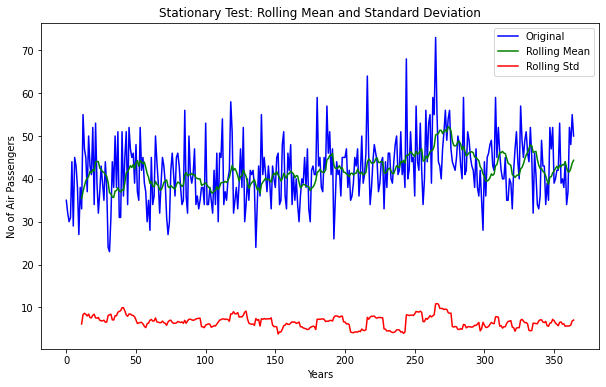

Results of Dickey-Fuller Test
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [3]:
stationarity_test(data['births'])

In [4]:
####    CONVERT IT INTO AN STATIONERY DATA : ->
data["diff_1"] = data["births"].diff(periods=1)


In [5]:
data.dropna(inplace = True)
data.head()

,date,births,diff_1
1,1959-01-02,32,-3.0
2,1959-01-03,30,-2.0
3,1959-01-04,31,1.0
4,1959-01-05,44,13.0
5,1959-01-06,29,-15.0


In [6]:
adfuller_test(data['diff_1'])

ADF Test Statistic : -12.625178633871355
p-value : 1.5472400091969005e-23
#Lags Used : 6
No. of observations : 357
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


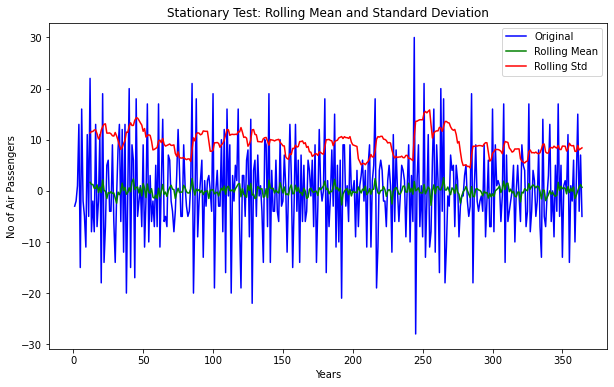

Results of Dickey-Fuller Test
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


In [7]:
stationarity_test(data['diff_1'])

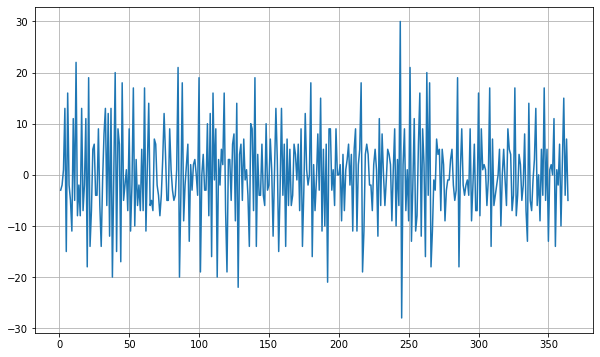

In [8]:
data.diff_1.plot(figsize=(10,6))
plt.grid("-")

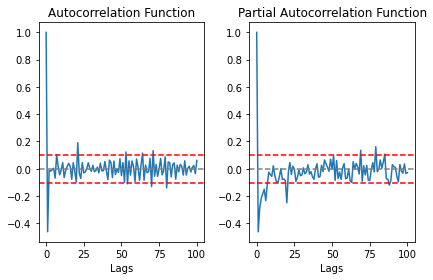

In [9]:
from statsmodels.tsa.stattools import adfuller,acf, pacf

lag_acf = acf(data.diff_1, nlags=100)
lag_pacf = pacf(data.diff_1, nlags=100, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


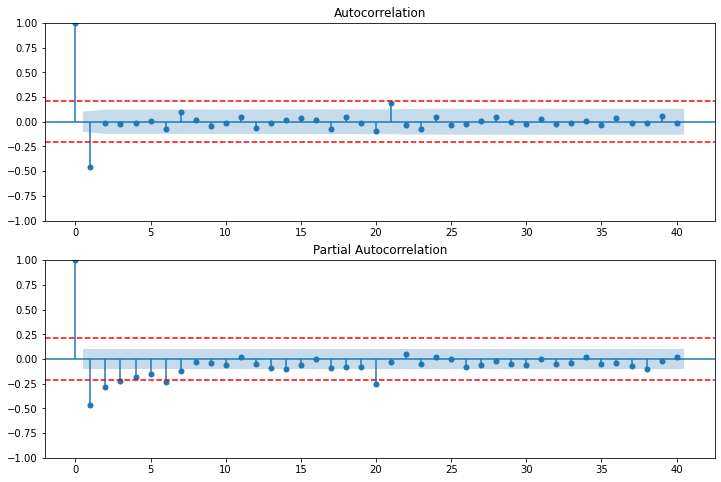

In [10]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.diff_1.values.squeeze(), lags=40, ax=ax1)
plt.axhline(y=-4/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(data.diff_1)),linestyle='--',color='red')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.diff_1, lags=40, ax=ax2)
plt.axhline(y=-4/np.sqrt(len(data.diff_1)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(data.diff_1)),linestyle='--',color='red')

In [11]:
data.head(2)

,date,births,diff_1
1,1959-01-02,32,-3.0
2,1959-01-03,30,-2.0


D:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


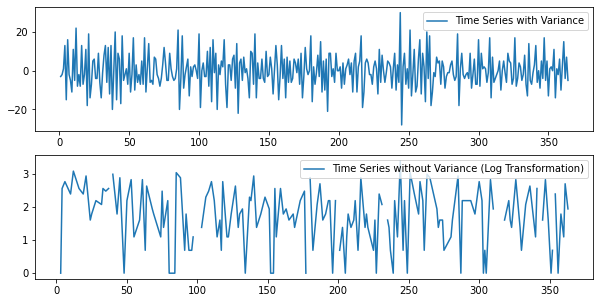

In [12]:
### NOW LET'S SEE THE LOGARITHMIC TRANSFORMATION :----->

df_log = np.log(data['diff_1']).dropna()

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(data['diff_1'], label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

In [13]:
df_log

3      0.000000
4      2.564949
6      2.772589
10     2.397895
12     3.091042
         ...   
356    0.000000
358    1.791759
360    1.098612
361    2.708050
363    1.945910
Name: diff_1, Length: 182, dtype: float64

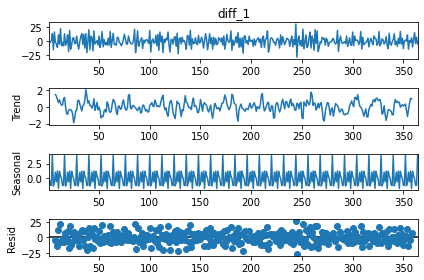

In [14]:
# Decomposition of Time Series
# Let's now use the decomposition technique to deconstruct the log transformed time series data, 
# so that we can check the stationarity using residual data.
decomposition = sm.tsa.seasonal_decompose(data['diff_1'],period =12)
fig = decomposition.plot()

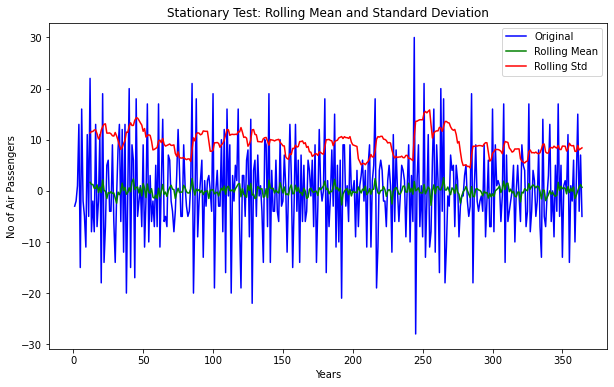

Results of Dickey-Fuller Test
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64
-------------------------------------------------------------------------------- 

ADF Test Statistic : -12.625178633871355
p-value : 1.5472400091969005e-23
#Lags Used : 6
No. of observations : 357
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


In [15]:
stationarity_test(data['diff_1'])
print("-"*80, "\n")
adfuller_test(data['diff_1'])

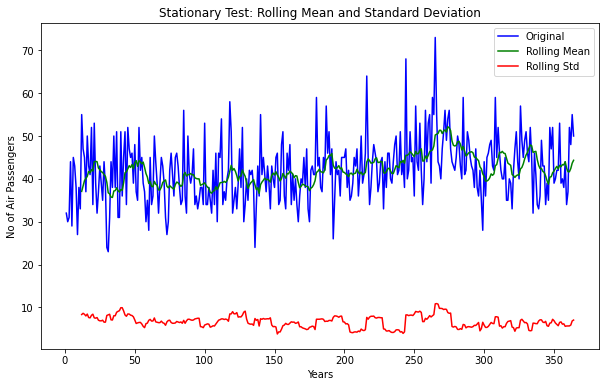

Results of Dickey-Fuller Test
Test Statistic                  -4.737071
p-value                          0.000072
#Lags Used                       6.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64
-------------------------------------------------------------------------------- 

ADF Test Statistic : -4.737070507926299
p-value : 7.164595942656453e-05
#Lags Used : 6
No. of observations : 357
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


In [16]:
stationarity_test(data['births'])
print("-"*80, "\n")
adfuller_test(data['births'])

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


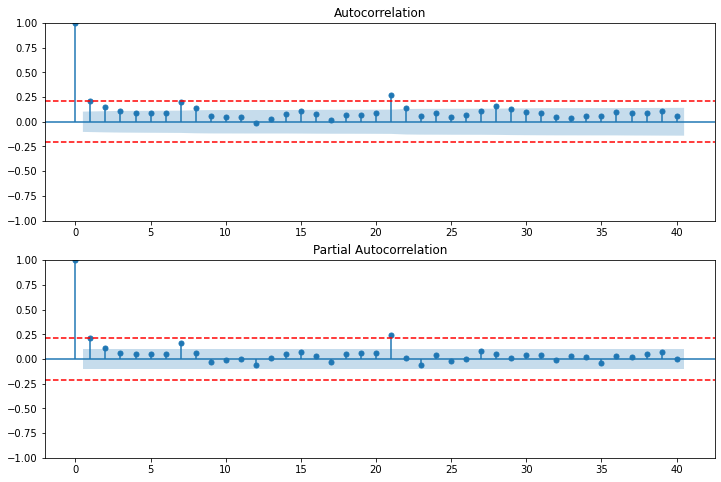

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.births.values.squeeze(), lags=40, ax=ax1)
plt.axhline(y=-4/np.sqrt(len(data.births)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(data.births)),linestyle='--',color='red')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.births, lags=40, ax=ax2)
plt.axhline(y=-4/np.sqrt(len(data.births)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(data.births)),linestyle='--',color='red')

In [18]:
data_day = data.resample('D', on='date').mean()

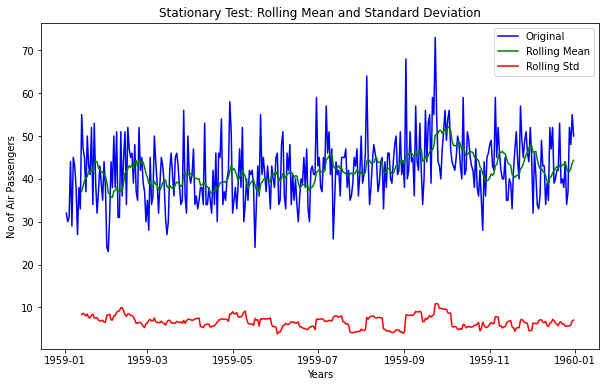

Results of Dickey-Fuller Test
Test Statistic                  -4.737071
p-value                          0.000072
#Lags Used                       6.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64
-------------------------------------------------------------------------------- 

ADF Test Statistic : -4.737070507926299
p-value : 7.164595942656453e-05
#Lags Used : 6
No. of observations : 357
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


In [19]:
####  NOW CHECK WHETHER THE DATA IS STATIONERY OR NOT : ----->
stationarity_test(data_day['births'])
print("-"*80, "\n")
adfuller_test(data_day['births'])

In [20]:
print("SHAPE OF THE DATA :--->", data_day.shape)
train_data = data_day.iloc[:300]
print("SHAPE OF THE TRAIN DATA :---->", train_data.shape)
test_data = data_day.iloc[300:]
print("SHAPE OF THE TEST DATA :------>", test_data.shape)

SHAPE OF THE DATA :---> (364, 2)
SHAPE OF THE TRAIN DATA :----> (300, 2)
SHAPE OF THE TEST DATA :------> (64, 2)


In [21]:
train_data.head(2)

,births,diff_1
date,,
1959-01-02,32.0,-3.0
1959-01-03,30.0,-2.0


D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


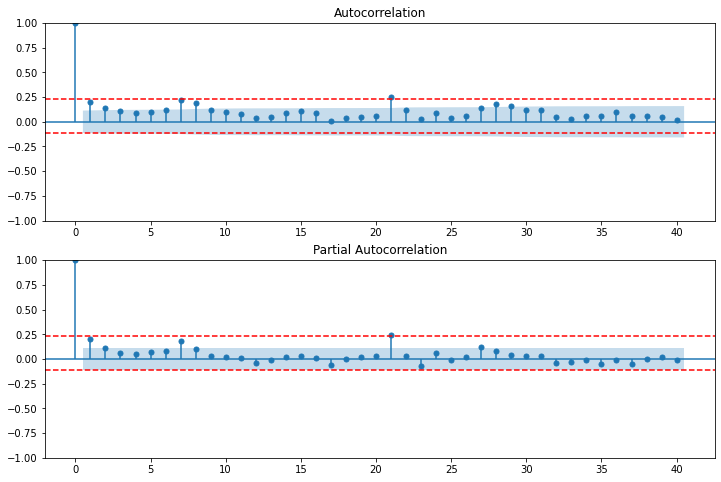

In [22]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data.births.values.squeeze(), lags=40, ax=ax1)
plt.axhline(y=-2/np.sqrt(len(train_data.births)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(train_data.births)),linestyle='--',color='red')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data.births, lags=40, ax=ax2)
plt.axhline(y=-2/np.sqrt(len(train_data.births)),linestyle='--',color='red')
plt.axhline(y=4/np.sqrt(len(train_data.births)),linestyle='--',color='red')

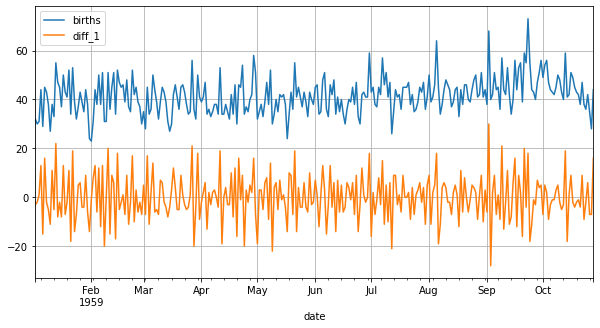

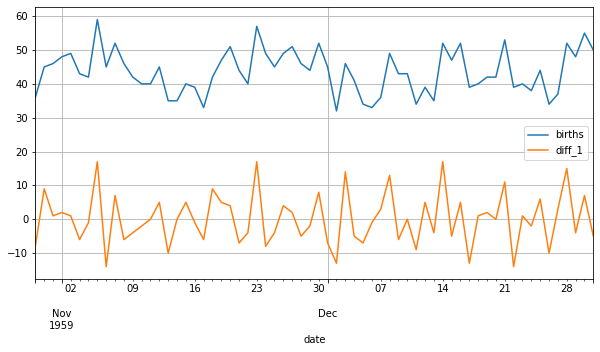

In [23]:
### NOW CHECK WHETHER THE DATA IS STATIONERY OR NOT ? 

train_data.plot(figsize = (10,5))
plt.grid("-")
test_data.plot(figsize = (10,5))
plt.grid("-")

In [24]:
train_data.head()

,births,diff_1
date,,
1959-01-02,32.0,-3.0
1959-01-03,30.0,-2.0
1959-01-04,31.0,1.0
1959-01-05,44.0,13.0
1959-01-06,29.0,-15.0


Text(0.5, 1.0, 'AR Model, RSS: 35926.2070')

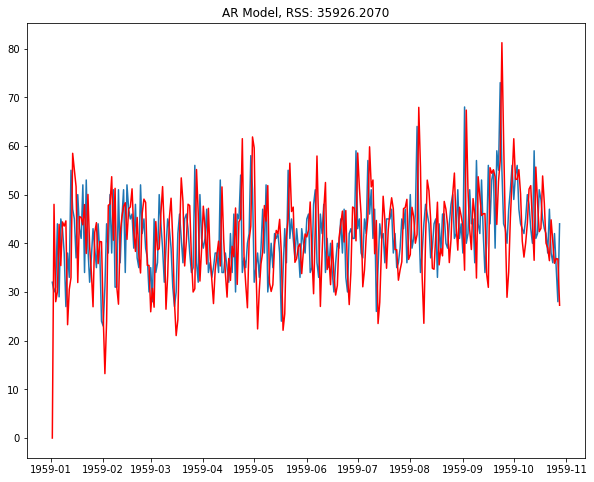

In [25]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use

##  AR Model¶
##  Since 'q' is MA model parameter we will keep its value as '0'.

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['births'], order=(2, 2, 0))  
results_AR = model.fit()# If disp < 0 convergence information will not be printed
plt.figure(figsize=(10,8))
plt.plot(train_data['births'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - train_data['births'])**2))

In [26]:
# MA Model
# Since 'p' is AR model parameter we will keep its value as '0'.)

Text(0.5, 1.0, 'AR Model, RSS: 17666.9344')

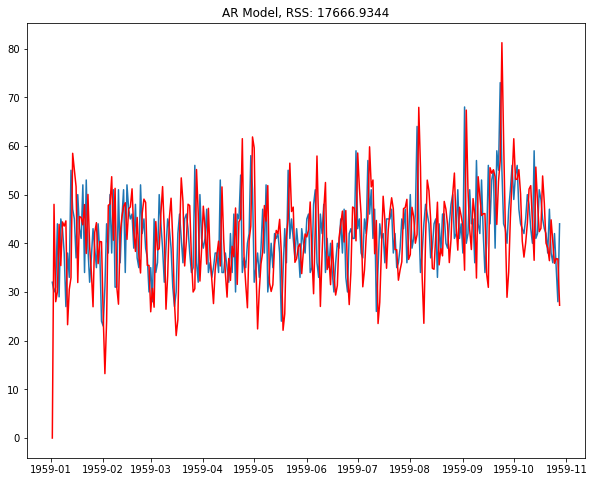

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['births'], order=(0, 2, 2))  
results_MA = model.fit()# If disp < 0 convergence information will not be printed
plt.figure(figsize=(10,8))
plt.plot(train_data['births'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_MA.fittedvalues - train_data['births'])**2))

In [28]:
####  Combined Model:------->

D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'AR Model, RSS: 15969.2654')

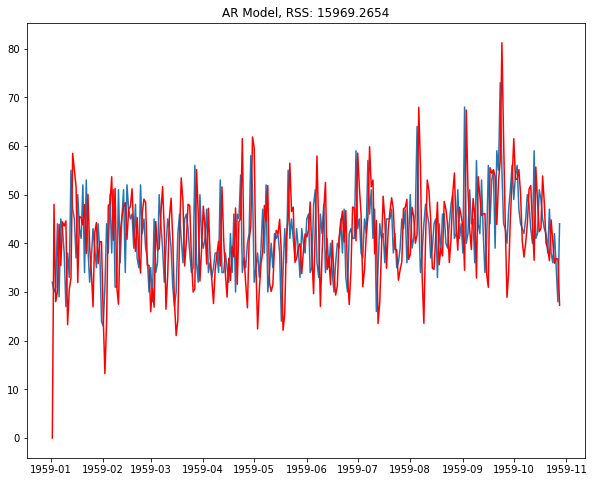

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['births'], order=(3, 1, 3))  
results_ARIMA = model.fit()# If disp < 0 convergence information will not be printed
plt.figure(figsize=(10,8))
plt.plot(train_data['births'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues - train_data['births'])**2))

In [30]:
# Create a separate series of predicted values
prediction = pd.DataFrame(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(prediction))
prediction.head()

Total no of predictions:  300


,0
date,
1959-01-02,0.000000
1959-01-03,31.998658
1959-01-04,30.930006
1959-01-05,30.960007
1959-01-06,35.573002


In [31]:
# predictions_diff_cumsum = predictions_diff.cumsum()
# predictions_diff_cumsum.head()

In [32]:
# train_data['births']
# prediction

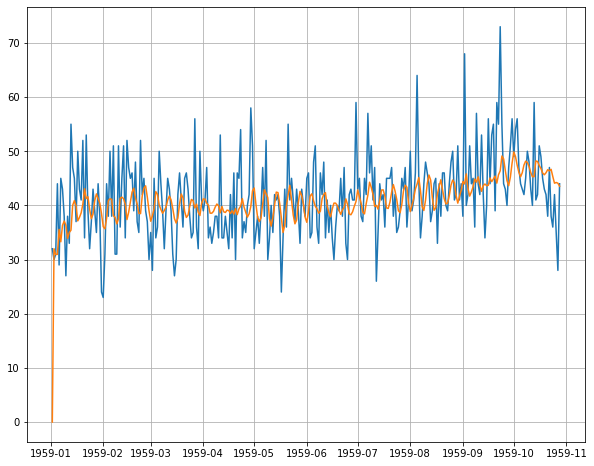

In [33]:
plt.figure(figsize=(10,8))
plt.plot(train_data['births'])
plt.plot(prediction)
plt.grid("-")

In [34]:
# df_predictions =pd.DataFrame(prediction, columns=['Predicted Values'])
# pd.concat([train_data['births'],df_predictions],axis =1).T

In [35]:
train_data = train_data['births']

In [36]:
train_data

date
1959-01-02    32.0
1959-01-03    30.0
1959-01-04    31.0
1959-01-05    44.0
1959-01-06    29.0
              ... 
1959-10-24    36.0
1959-10-25    42.0
1959-10-26    35.0
1959-10-27    28.0
1959-10-28    44.0
Freq: D, Name: births, Length: 300, dtype: float64

In [37]:
# prediction.rename(columns={0:"Predictions"})

pd.concat([train_data,prediction.rename(columns={0:"Predictions"})],axis =1).T

date,1959-01-02,1959-01-03,1959-01-04,1959-01-05,1959-01-06,1959-01-07,1959-01-08,1959-01-09,1959-01-10,1959-01-11,...,1959-10-19,1959-10-20,1959-10-21,1959-10-22,1959-10-23,1959-10-24,1959-10-25,1959-10-26,1959-10-27,1959-10-28
births,32.0,30.000000,31.000000,44.000000,29.000000,45.00000,43.000000,38.000000,27.000000,38.00000,...,43.000000,42.000000,38.000000,47.000000,38.000000,36.000000,42.000000,35.000000,28.000000,44.000000
Predictions,0.0,31.998658,30.930006,30.960007,35.573002,33.28273,36.311253,37.105884,36.345701,33.89276,...,45.657883,46.026799,46.605784,46.372718,46.667636,45.329143,44.099997,44.233148,44.099241,43.541862


Future Forecasting
We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
If we want to forecast for next 5 years or 60 months then, ‘end’ count will be > 144 + 60 = 204.
We are going to use statsmodels plot_predict() method for it

In [38]:
print(train_data.shape)

(300,)


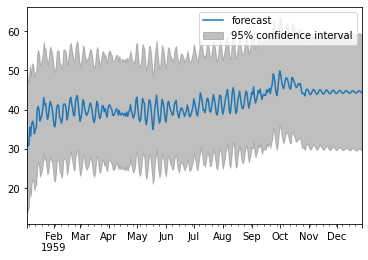

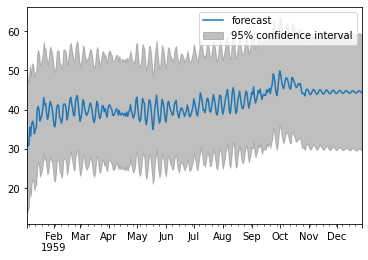

In [39]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results_ARIMA , start = 1, end= 360) 

In [40]:
test_data.head(2)

,births,diff_1
date,,
1959-10-29,36.0,-8.0
1959-10-30,45.0,9.0


In [41]:
forecast_values = pd.DataFrame(results_ARIMA.forecast(steps = 60)).rename(columns={'predicted_mean': "ForeCast"})
forecast_values.head(3)

,ForeCast
1959-10-29,44.773036
1959-10-30,45.248485
1959-10-31,45.177483


In [42]:
forecasting_actual_data = forecast_values.reset_index().rename(columns={"index":"date"}).merge(test_data[['births']].reset_index(), on = 'date').round()

In [43]:
forecasting_actual_data.head(5)

,date,ForeCast,births
0,1959-10-29,45.0,36.0
1,1959-10-30,45.0,45.0
2,1959-10-31,45.0,46.0
3,1959-11-01,45.0,48.0
4,1959-11-02,44.0,49.0


In [44]:
# pred= results_ARIMA.forecast(steps=45)[0]
pred= pd.DataFrame(results_ARIMA.forecast(steps=64))
pred = np.array(pred['predicted_mean'])
print("Total predicted data :--->", len(pred))

test_data = np.array(test_data['births'])
print("Total predicted data :-->", len(test_data))

print("-"*124)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred))

Total predicted data :---> 64
Total predicted data :--> 64
----------------------------------------------------------------------------------------------------------------------------


6.451808585023816

In [47]:
# from sklearn.metrics import r2_score
# test['predicted_sales'] = prediction
# r2_score(test['Champagne sales'], test['predicted_sales'])

from sklearn.metrics import r2_score
r2_score(pred, test_data)

-356.82646041309056